In [5]:
import numpy as np
import matplotlib as plt
from qutip import *
import time

$H =  - \sum\limits_{j = 1}^N {\vec h{{\vec \sigma }_j} - J} \sum\limits_{j = 1}^{N - 1} {{{\vec \sigma }_j}{{\vec \sigma }_{j + 1}}}$

${h_x}(t) = \sin (\frac{{{v^2}{t^2}}}{{2\pi }})$

${h_z}(t) = \cos (\frac{{{v^2}{t^2}}}{{2\pi }})$

${h_y}(t) = 0$

In [3]:
def ExpectofSpinChain(N,J,hx,hy,hz,time_list):
    #psi0 is the initial state
    #N(int) is the number of spins
    #J(int) is the interacting strength
    #{hx,hy,hz}(string) is the strength of the magnetic field and input as string type.
    #time_list(list[]) define the time list for solving SE equantion
    si = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    #define some abbr
    sx_list = []
    sy_list = []
    sz_list = []
    for n in range(N):
        op_list = []
        for m in range(N):
            op_list.append(si)

        op_list[n] = sx
        sx_list.append(tensor(op_list))

        op_list[n] = sy
        sy_list.append(tensor(op_list))

        op_list[n] = sz
        sz_list.append(tensor(op_list))
    #construct a Operator List for convenience.
    H0 = 0
    for n in range(N-1):
        H0 += -  J * sx_list[n] * sx_list[n+1]
        H0 += -  J * sy_list[n] * sy_list[n+1]
        H0 += -  J * sz_list[n] * sz_list[n+1]
    #construct the static part of Hamiltonian
    H_dynamic_x = 0
    for n in range(N):
        H_dynamic_x += -  sx_list[n]
    H_dynamic_y = 0
    for n in range(N):
        H_dynamic_y += -  sy_list[n]
    H_dynamic_z = 0
    for n in range(N):
        H_dynamic_z += -  sz_list[n]
    #construct the dynamical parts of Hamitonian
    psi0 = (H0 + H_dynamic_z).groundstate()[1]
    #construct the initial state
    H = [H0,[H_dynamic_x,hx],[H_dynamic_y,hy],[H_dynamic_z,hz]]
    result = mesolve(H,psi0,time_list,[],sy_list)
    return result.expect

In [16]:
start_time = time.time()
hx = 'sin(0.01*pow(t,2)/(2*pi))'
hz = 'cos(0.01*pow(t,2)/(2*pi))'
hy = '0'
# the configuration of magnetic field,fixed v = 0.1
N = 10
step_of_J = 100
J =  np.linspace(-1.6,0.1,step_of_J)
step = 100
# the step of time list
t_list = np.linspace(0,np.pi/0.1,step)
my = []
for i in range(step_of_J):
    temp = 0
    for n in range(N):
        temp += ExpectofSpinChain(N,J[i],hx,hy,hz,t_list)[n][step-1]/0.1 
    my.append(temp)
end_time = time.time()
print end_time - start_time

5560.77311182


In [ ]:
start_time = time.time()
hx = 'sin(0.01*pow(t,2)/(2*pi))'
hz = 'cos(0.01*pow(t,2)/(2*pi))'
hy = '0'
# the configuration of magnetic field,fixed v = 0.1
N = 10
step_of_J = 100
J =  np.linspace(-1.6,0.1,step_of_J)
step = 100
# the step of time list
t_list = np.linspace(0,np.pi/0.1,step)
my = []
for i in range(step_of_J):
    temp = 0
    for n in range(N):
        temp += ExpectofSpinChain(N,J[i],hx,hy,hz,t_list)[n][step-1]/0.1 
    my.append(temp)
end_time = time.time()
print end_time - start_time

In [11]:
fig , ax = plt.pyplot.subplots()

In [38]:
ax.clear()
ax.plot(J,my,'ro-')
ax.set_xlabel('J(Strength of Interacition)')
ax.set_ylabel('${F_{\phi \theta }}$')
ax.set_title('The Berry Curvature in Heisenberg Spin Chain')
ax.legend(('$N=10$',''))

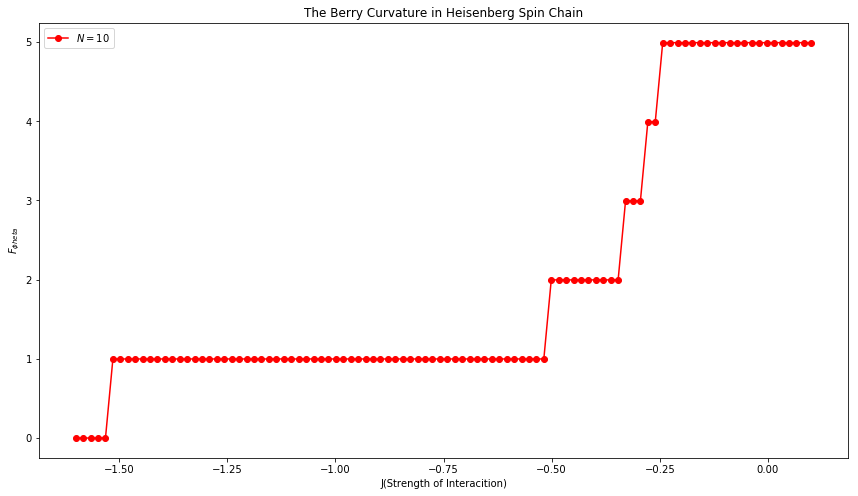

In [39]:
fig.set_size_inches(14.5, 8)
fig

In [4]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.0.2
Numpy,1.12.0
SciPy,0.18.1
matplotlib,2.0.0
Cython,0.25.2
Number of CPUs,2
BLAS Info,OPENBLAS
IPython,5.1.0
Python,"2.7.13 |Anaconda 4.3.0 (x86_64)| (default, Dec 20 2016, 23:05:08) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
